In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow import keras
import numpy as np
import math

import sklearn.model_selection as sk

import matplotlib.pyplot as plt

keras.backend.clear_session()

In [0]:
def fuel_function(x):
    return max(math.trunc((x // 3) - 2.0), 0.0)

x = np.arange(0, 200000, 100)

vectorized_function = np.vectorize(fuel_function)
y = vectorized_function(x)
X = x.reshape(-1, 1)

Split data to training and test sets

In [0]:
X_train, X_test, y_train, y_test = sk.train_test_split(X,y,test_size=0.33, random_state = 42)

Plot our training set

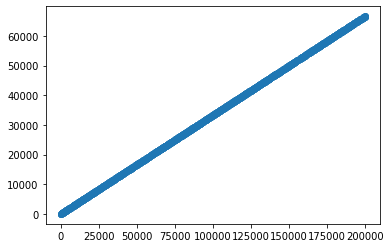

In [4]:
plt.scatter(X_train, y_train)

Set up model. I have no idea what I'm doing here

In [5]:
inputs = keras.layers.Input(shape=(1,))
 
x = keras.layers.Dense(25, activation='relu')(inputs)
x = keras.layers.Dense(10, activation='relu')(x)

predictions = keras.layers.Dense(1)(x)
 
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)

model = keras.models.Model(inputs=inputs, outputs=predictions)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mse'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train the model on training set

In [6]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 10000)


Train on 1340 samples
Epoch 1/1000
1340/1340 [==============================] - 0s 59us/sample - loss: 921712000.0000 - mean_squared_error: 921712000.0000
Epoch 2/1000
1340/1340 [==============================] - 0s 2us/sample - loss: 910651264.0000 - mean_squared_error: 910651264.0000
Epoch 3/1000
1340/1340 [==============================] - 0s 2us/sample - loss: 902693824.0000 - mean_squared_error: 902693824.0000
Epoch 4/1000
1340/1340 [==============================] - 0s 2us/sample - loss: 896070528.0000 - mean_squared_error: 896070528.0000
Epoch 5/1000
1340/1340 [==============================] - 0s 2us/sample - loss: 890219968.0000 - mean_squared_error: 890219968.0000
Epoch 6/1000
1340/1340 [==============================] - 0s 2us/sample - loss: 884881472.0000 - mean_squared_error: 884881472.0000
Epoch 7/1000
1340/1340 [==============================] - 0s 2us/sample - loss: 879910272.0000 - mean_squared_error: 879910272.0000
Epoch 8/1000
1340/1340 [=============================

Plot training set and then test set on top of it

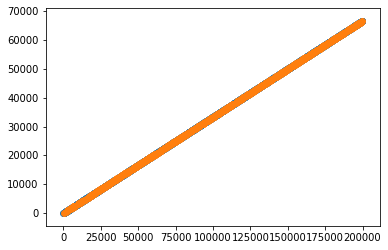

In [7]:
plt.scatter(X_train, y_train)

y_test = model.predict(X_test)
plt.scatter(X_test, y_test)


And let's get our input set and predict the result

In [8]:
mass_data = np.array([144475,145308,100615,56900,128773,65519,74165,99081,141047,149128,148282,109528,55909,70885,115049,149631,52276,101944,113005,102876,64365,71178,122767,86272,139199,78631,71958,81288,70401,77582,118275,115648,91350,121735,130339,55146,137351,101940,112657,133288,81503,136812,67015,142573,125537,99231,61693,85719,80659,148431,101176,77853,108201,138945,81804,55795,141837,113490,57932,81023,76756,79023,73527,75874,63332,62055,76124,54254,68482,141113,84335,58747,84723,137564,132605,94970,50312,89127,143858,124587,52272,138039,53782,93085,83456,94432,121481,93700,114222,117849,147460,110324,75337,130464,88805,109489,71109,95625,115832,123252])
mass_data_tensor = mass_data.reshape(-1, 1)

fuel_predicted = model.predict(mass_data_tensor)

fuel_predicted


array([[48119.08 ],
       [48396.51 ],
       [33511.05 ],
       [18951.318],
       [42889.367],
       [21821.967],
       [24701.605],
       [33000.133],
       [46977.348],
       [49668.805],
       [49387.043],
       [36479.617],
       [18621.258],
       [23609.17 ],
       [38318.438],
       [49836.34 ],
       [17411.246],
       [33953.688],
       [37637.664],
       [34264.098],
       [21437.615],
       [23706.756],
       [40889.008],
       [28733.967],
       [46361.85 ],
       [26189.053],
       [23966.54 ],
       [27073.992],
       [23447.965],
       [25839.67 ],
       [39392.89 ],
       [38517.945],
       [30425.246],
       [40545.28 ],
       [43410.94 ],
       [18367.133],
       [45746.363],
       [33952.35 ],
       [37521.758],
       [44393.133],
       [27145.604],
       [45566.836],
       [22320.227],
       [47485.598],
       [41811.58 ],
       [33050.094],
       [20547.678],
       [28549.787],
       [26864.498],
       [49436.668],


And let's get the total sum. 

In [9]:
np.sum(fuel_predicted)

3295443.0

Well error rate isn't too bad

In [10]:
(np.sum(fuel_predicted) - 3297896) / 3297896

-0.000743807567006358